In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

Data loading.

In [27]:
df_mushrooms = pd.read_csv("mushroom-dataset/agaricus-lepiota.data", header= None)
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df_mushrooms.columns = column_names
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [37]:
df_mushrooms.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


We have 8124 values and 23 columns in our dataset.

In [36]:
df_mushrooms.shape

(8124, 23)

We can see that we have "?" in dataset which represents missing values. We need to change it since Pthon won't treat those as missing values and it will challenge out preprocessing if we don't change it. We can see we have 2480 missing values in the column "stalk-root".

In [35]:
df_mushrooms.replace("?", np.nan, inplace = True)
df_mushrooms.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Here we can see how many unique values each columns has and their frequency

In [39]:
df_mushrooms.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Here you can see that the class column is almost equally distributed, but we would need to balance it so it won't be biased

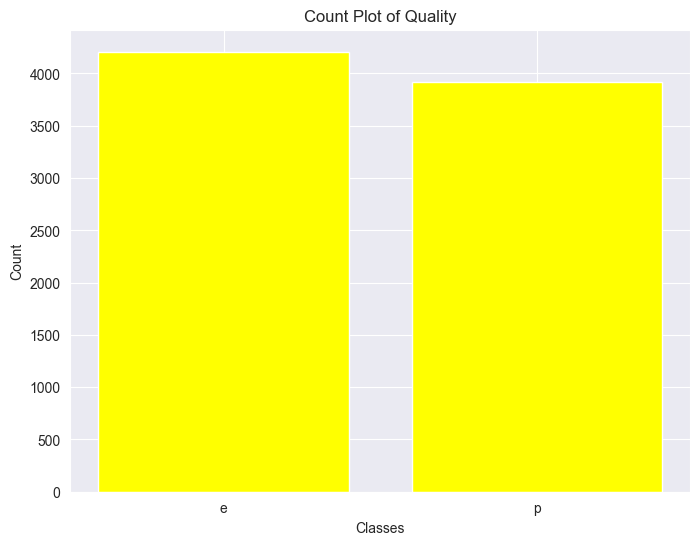

In [44]:
class_counts = df_mushrooms['class'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts, color='yellow')
plt.title('Count Plot of Quality')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

Here we can see the dependency between odor and class and odors exists in one class only (except for n, which stands for none)

<Axes: title={'center': 'Mushroom Class vs Odor Heatmap'}, xlabel='odor', ylabel='class'>

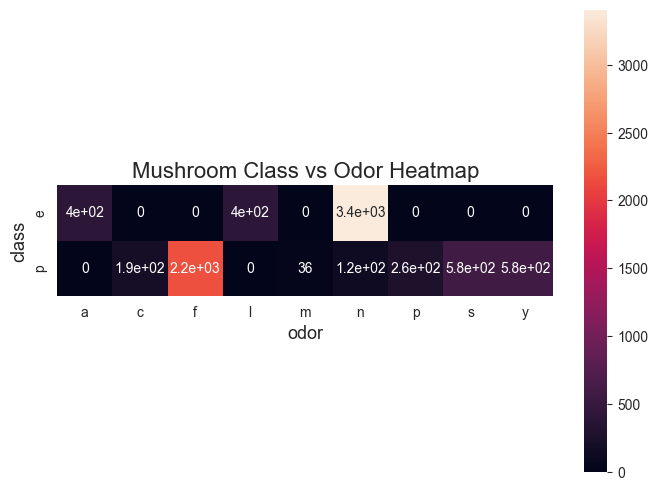

In [59]:
cross_tab_class = pd.crosstab(df_mushrooms["class"], df_mushrooms["odor"])
plt.figure(figsize=(8, 6))
plt.title("Mushroom Class vs Odor Heatmap", fontsize=16)
plt.xlabel("Odor", fontsize=13)
plt.ylabel("Class", fontsize=13)
sns.heatmap(cross_tab_class, annot=True, square=True)

Here we can see that some mushrooms with particular cap colors appear some in some places than others

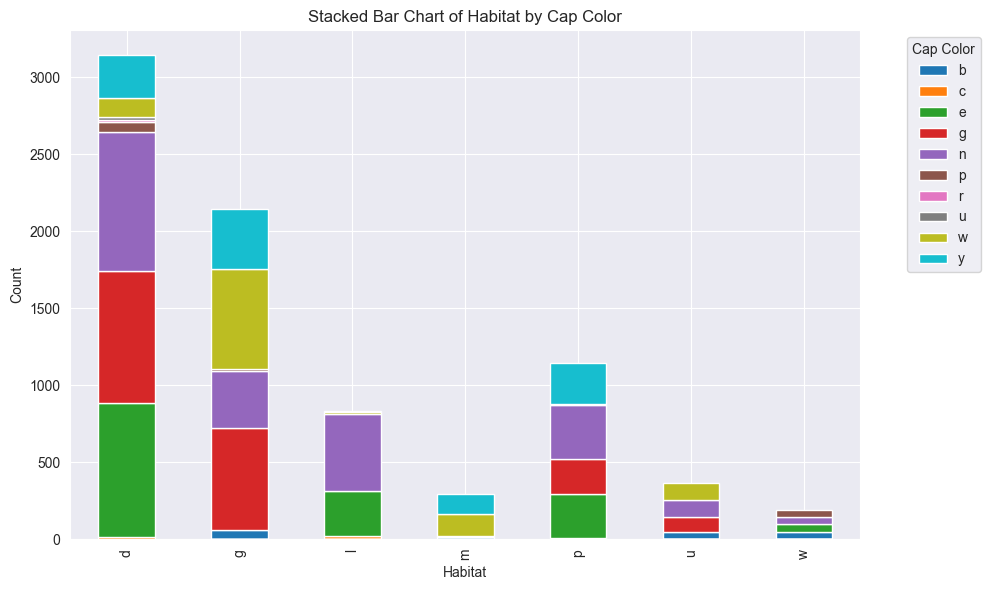

In [85]:
pivot = pd.crosstab(df_mushrooms['habitat'], df_mushrooms['cap-color'])

pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Chart of Habitat by Cap Color')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.legend(title='Cap Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

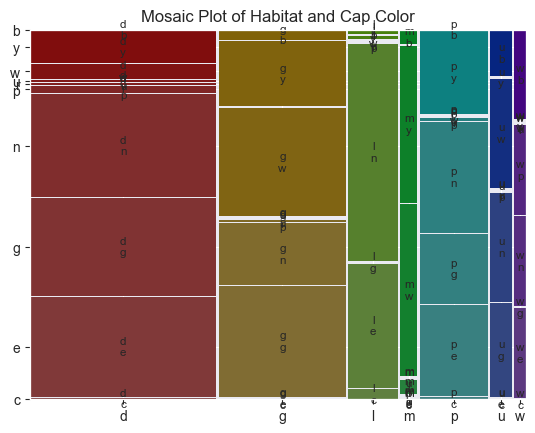